In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
#!pip install cartopy

In [26]:
# importing datasets 
data14 = pd.read_csv('constituency_wise_results_2014.csv')
data19 = pd.read_csv('constituency_wise_results_2019.csv')

In [27]:
# primary cleaning
# 1. clearing head&tailspaces\

In [28]:
#data14[data14['pc_name']=='Adilabad'] # getting an error because the name is stored with a trialing space.
cols = ['state','pc_name','candidate','category','sex','party','party_symbol']
# trimming blankspaces
for col in cols:
    data14[col] = data14[col].astype('str')
    data14[col] = data14[col].str.strip()

for col in cols:
    data19[col] = data19[col].astype('str')
    data19[col] = data19[col].str.strip()
    
data14[data14['pc_name']=='Adilabad']

,state,pc_name,candidate,sex,age,category,party,party_symbol,general_votes,postal_votes,total_votes,total_electors
0,Andhra Pradesh,Adilabad,GODAM NAGESH,M,49.0,ST,TRS,Car,425762,5085,430847,1386282
1,Andhra Pradesh,Adilabad,NARESH,M,37.0,ST,INC,Hand,257994,1563,259557,1386282
2,Andhra Pradesh,Adilabad,RAMESH RATHOD,M,48.0,ST,TDP,Bicycle,182879,1319,184198,1386282
3,Andhra Pradesh,Adilabad,RATHOD SADASHIV,M,55.0,ST,BSP,Elephant,94363,57,94420,1386282
4,Andhra Pradesh,Adilabad,NETHAWATH RAMDAS,M,44.0,ST,IND,Auto- Rickshaw,41028,4,41032,1386282
5,Andhra Pradesh,Adilabad,PAWAR KRISHNA,M,33.0,ST,IND,Bat,5051,4,5055,1386282
6,Andhra Pradesh,Adilabad,BANKA SAHADEV,M,53.0,ST,IND,Gas Cylinder,4780,7,4787,1386282
7,Andhra Pradesh,Adilabad,MOSALI CHINNAIAH,M,40.0,ST,IND,Almirah,8842,17,8859,1386282
8,Andhra Pradesh,Adilabad,None of the Above,nan,NaN,nan,NOTA,NOTA,17021,63,17084,1386282


In [29]:
# pcs14 = data14['pc_name'].unique()
# pcs19 = data19['pc_name'].unique()
# states14 = data14['state'].unique()
# states19 = data19['state'].unique()

# notice that states orissa, chattisgarh & telangana missing in 2014 data
# also, note that 2014 has only 508 constituencies while 2019 has 540 constituencies
# the reason is that the data related to constituencies in odisha (21), chattisgarh (11) are missing in 2014 data.

In [30]:
# so, we must identify constituencies from 2019 for orissa, chattisgarh & telangana and change corresponding states in 2014
pcs_odisha = data19.loc[data19['state']=='Odisha','pc_name'].unique()
for constituency in pcs_odisha:
    data14.loc[data14['pc_name']==constituency,'state'] = 'Odisha'

pcs_Chhattisgarh = data19.loc[data19['state']=='Chhattisgarh','pc_name'].unique()
for constituency in pcs_Chhattisgarh:
    data14.loc[data14['pc_name']==constituency,'state'] = 'Chhattisgarh'

pcs_Telangana = data19.loc[data19['state']=='Telangana','pc_name'].unique()
for constituency in pcs_Telangana:
    data14.loc[data14['pc_name']==constituency,'state'] = 'Telangana'

data14

,state,pc_name,candidate,sex,age,category,party,party_symbol,general_votes,postal_votes,total_votes,total_electors
0,Telangana,Adilabad,GODAM NAGESH,M,49.0,ST,TRS,Car,425762,5085,430847,1386282
1,Telangana,Adilabad,NARESH,M,37.0,ST,INC,Hand,257994,1563,259557,1386282
2,Telangana,Adilabad,RAMESH RATHOD,M,48.0,ST,TDP,Bicycle,182879,1319,184198,1386282
3,Telangana,Adilabad,RATHOD SADASHIV,M,55.0,ST,BSP,Elephant,94363,57,94420,1386282
4,Telangana,Adilabad,NETHAWATH RAMDAS,M,44.0,ST,IND,Auto- Rickshaw,41028,4,41032,1386282
...,...,...,...,...,...,...,...,...,...,...,...,...
8350,Puducherry,Puducherry,PUVALA NAGESWARA RAO,M,60.0,GEN,IND,Sewing Machine,465,0,465,901357
8351,Puducherry,Puducherry,K. MANJINI,M,41.0,GEN,IND,Coconut,767,0,767,901357
8352,Puducherry,Puducherry,R. VALAVAN,M,40.0,GEN,IND,Carrom Board,497,0,497,901357
8353,Puducherry,Puducherry,V. VIJAYA,F,29.0,GEN,IND,Green Chilli,746,0,746,901357


In [31]:
# check if constituencies and states changed from 2014 to 2019
regions14 = data14[['state','pc_name']].nunique()
regions19 = data19[['state','pc_name']].nunique()
print(regions14) # 34 no odisha, chattisgarh
print()
print(regions19)

state       34
pc_name    508
dtype: int64

state       36
pc_name    540
dtype: int64


In [32]:
# 3 constituencies each are in 2 different states with same name. so separating them
data14.loc[(data14['state']=='Himachal Pradesh') & (data14['pc_name']=='hamirpur'),'pc_name'] = 'hamirpur_HP'
data14.loc[(data14['state']=='Uttar Pradesh') & (data14['pc_name']=='hamirpur'),'pc_name'] = 'hamirpur_UP'

data14.loc[(data14['state']=='Bihar') & (data14['pc_name']=='aurangabad'),'pc_name'] = 'aurangabad_Bihar'
data14.loc[(data14['state']=='Maharastra') & (data14['pc_name']=='aurangabad'),'pc_name'] = 'aurangabad_Maharastra'

data14.loc[(data14['state']=='Bihar') & (data14['pc_name']=='maharajganj'),'pc_name'] = 'maharajganj_Bihar'
data14.loc[(data14['state']=='Uttar Pradesh') & (data14['pc_name']=='maharajganj'),'pc_name'] = 'maharajganj_UP'

In [33]:
# same for data19 
data19.loc[(data19['state']=='Himachal Pradesh') & (data19['pc_name']=='hamirpur'),'pc_name'] = 'hamirpur_HP'
data19.loc[(data19['state']=='Uttar Pradesh') & (data19['pc_name']=='hamirpur'),'pc_name'] = 'hamirpur_UP'

data19.loc[(data19['state']=='Bihar') & (data19['pc_name']=='aurangabad'),'pc_name'] = 'aurangabad_Bihar'
data19.loc[(data19['state']=='Maharastra') & (data19['pc_name']=='aurangabad'),'pc_name'] = 'aurangabad_Maharastra'

data19.loc[(data19['state']=='Bihar') & (data19['pc_name']=='maharajganj'),'pc_name'] = 'maharajganj_Bihar'
data19.loc[(data19['state']=='Uttar Pradesh') & (data19['pc_name']=='maharajganj'),'pc_name'] = 'maharajganj_UP'

----- data cleaning completed ----

In [35]:
# PRIMARY ANALYSIS

# states with highest & least number of constituncies state wise
constituencies_14 = data14[['state','pc_name']].drop_duplicates()
constituencies_14 = constituencies_14.groupby('state')['pc_name'].count().sort_values(ascending=False)
constituencies_14.tail(15)

state
Himachal Pradesh             4
Manipur                      2
Tripura                      2
Arunachal Pradesh            2
Goa                          2
Meghalaya                    2
Sikkim                       1
Dadra & Nagar Haveli         1
Puducherry                   1
Nagaland                     1
Mizoram                      1
Daman & Diu                  1
Chandigarh                   1
Lakshadweep                  1
Andaman & Nicobar Islands    1
Name: pc_name, dtype: int64

In [36]:
# constituency wise electoral roll

In [55]:
electors_constituency14 = pd.DataFrame(data14.groupby(['state','pc_name'])['total_electors'].mean()).reset_index().sort_values(by='total_electors',ascending=False)
electors_state14 = pd.DataFrame(electors_constituency14.groupby('state')['total_electors'].sum()).reset_index().sort_values(by='total_electors',ascending=False)
print(electors_state14.head()) # top 5 states with highest electoral roll
print()
print(electors_state14.tail()) # bottom 5 states
print()
print(electors_constituency14.head())
print()
print(electors_constituency14.tail())

            state  total_electors
31  Uttar Pradesh     138810557.0
18    Maharashtra      80798823.0
4           Bihar      63800160.0
33    West Bengal      62833113.0
28     Tamil Nadu      55114867.0

                        state  total_electors
27                     Sikkim        370770.0
0   Andaman & Nicobar Islands        269360.0
6        Dadra & Nagar Haveli        196597.0
7                 Daman & Diu        111827.0
16                Lakshadweep         49922.0

             state           pc_name  total_electors
373      Telangana        Malkajgiri       3183083.0
149      Karnataka   Bangalore North       2401472.0
417  Uttar Pradesh         Ghaziabad       2357553.0
283   NCT OF Delhi  NORTH WEST DELHI       2194343.0
150      Karnataka   Bangalore Rural       2190398.0

                         state                    pc_name  total_electors
0    Andaman & Nicobar Islands  Andaman & Nicobar Islands        269360.0
84        Dadra & Nagar Haveli       Dadar & Nagar 

In [57]:
electors_constituency19 = pd.DataFrame(data19.groupby(['state','pc_name'])['total_electors'].mean()).reset_index().sort_values(by='total_electors',ascending=False)
electors_state19 = pd.DataFrame(electors_constituency19.groupby('state')['total_electors'].sum()).reset_index().sort_values(by='total_electors',ascending=False)
print(electors_state19.head()) # top 5 states with highest electoral roll
print()
print(electors_state19.tail()) # bottom 5 states
print()
print(electors_constituency19.head())
print()
print(electors_constituency19.tail())

            state  total_electors
33  Uttar Pradesh     146134603.0
19    Maharashtra      88676946.0
4           Bihar      71216290.0
35    West Bengal      70001284.0
30     Tamil Nadu      59941832.0

                        state  total_electors
29                     Sikkim        434128.0
0   Andaman & Nicobar Islands        318471.0
7        Dadra & Nagar Haveli        250029.0
8                 Daman & Diu        121740.0
17                Lakshadweep         55189.0

             state          pc_name  total_electors
405      Telangana       Malkajgiri       3150313.0
159      Karnataka  Bangalore North       2849250.0
449  Uttar Pradesh        Ghaziabad       2728978.0
160      Karnataka  Bangalore Rural       2497458.0
399      Telangana         CHEVELLA       2443112.0

                         state                    pc_name  total_electors
0    Andaman & Nicobar Islands  Andaman & Nicobar Islands        318471.0
94        Dadra & Nagar Haveli     Dadra And Nagar Haveli

In [39]:
# data 2014 analysis

In [59]:
constituencywisevoted14 = data14.groupby(['pc_name','state'])['total_votes'].sum()
constituencywisevoters14 = data14.groupby('pc_name')['total_electors'].mean()
# total_voters_in_india14 = constituencywisevoters.sum()
#total_voted_in_india14 = data14['total_votes'].sum()
constituency_vote_turnout_ratio14 = pd.DataFrame(np.floor(100*constituencywisevoted14/constituencywisevoters14)).reset_index()
constituency_vote_turnout_ratio14.columns = ['pc_name','state','vote_turnout_ratio']
constituency_vote_turnout_ratio14 = constituency_vote_turnout_ratio14.sort_values(by='vote_turnout_ratio',ascending=False)
top5constituencies14 = constituency_vote_turnout_ratio14.head() # something wrong. 2 constituencies with same name
bottom5constituencies14 = constituency_vote_turnout_ratio14.tail()
print(top5constituencies14)
print()
print(bottom5constituencies14)

         pc_name        state  vote_turnout_ratio
144       Dhubri        Assam                88.0
464       Tamluk  West Bengal                87.0
344     Nagaland     Nagaland                87.0
255       Kanthi  West Bengal                86.0
289  Lakshadweep  Lakshadweep                86.0

         pc_name            state  vote_turnout_ratio
381  Patna Sahib            Bihar                45.0
248       Kalyan      Maharashtra                42.0
70     Baramulla  Jammu & Kashmir                39.0
29      Anantnag  Jammu & Kashmir                28.0
456     Srinagar  Jammu & Kashmir                25.0


In [41]:
bottom5constituencies14

,pc_name,state,vote_turnout_ratio
381,Patna Sahib,Bihar,45.0
248,Kalyan,Maharashtra,42.0
70,Baramulla,Jammu & Kashmir,39.0
29,Anantnag,Jammu & Kashmir,28.0
456,Srinagar,Jammu & Kashmir,25.0


In [42]:
subsetdata14 = data14[['state','pc_name','total_electors']].drop_duplicates()
statewiseelectors14 = subsetdata14.groupby('state')['total_electors'].sum()
statewiseelectors14.head()

state
Andaman & Nicobar Islands      269360
Andhra Pradesh               38946048
Arunachal Pradesh              759344
Assam                        18837713
Bihar                        63800160
Name: total_electors, dtype: int64

In [61]:
statewisevoted14 = data14.groupby('state')['total_votes'].sum()
state_vote_turnout_ratio14 = np.floor(100*statewisevoted14/statewiseelectors14)
print(state_vote_turnout_ratio14.sort_values(ascending=False).head())
print()
print(state_vote_turnout_ratio14.sort_values().head())

state
Nagaland                87.0
Lakshadweep             86.0
Tripura                 84.0
Dadra & Nagar Haveli    84.0
Sikkim                  83.0
dtype: float64

state
Jammu & Kashmir    49.0
Bihar              56.0
Uttar Pradesh      58.0
Maharashtra        60.0
Mizoram            61.0
dtype: float64


In [44]:
# top 5 winning candidates by margin
top2 = data14.groupby(['state','pc_name'])['total_votes'].nlargest(2).reset_index()
top2 = pd.merge(top2,data14,how='left',left_on='level_2',right_index=True)[['state_x','pc_name_x','candidate','total_votes_y']]
top2

list = []
for i in range(0,len(top2)-1,2):
    state_i = top2['state_x'][i]
    pc_name_i = top2['pc_name_x'][i]
    candidate_i = top2['candidate'][i]
    margin_i = top2['total_votes_y'][i]-top2['total_votes_y'][i+1]
    list.append([state_i,pc_name_i,candidate_i,margin_i])
margin_table14 = pd.DataFrame(list)
margin_table14.columns = ['state/UT','pc_name','candidate','margin']
margins14 = margin_table14.sort_values(by='margin',ascending=False).head()
margins14

,state/UT,pc_name,candidate,margin
112,Gujarat,Vadodara,NARENDRA MODI,570128
417,Uttar Pradesh,Ghaziabad,VIJAY KUMAR SINGH,567260
104,Gujarat,Navsari,C. R. PATIL,558116
313,Rajasthan,Jaipur,RAMCHARAN BOHARA,539345
110,Gujarat,Surat,DARSHANA VIKRAM JARDOSH,533190


In [45]:
# NOTA 
nota_votes = data14[ data14['party'] == 'NOTA' ][['pc_name','state','total_votes','total_electors']].set_index('pc_name')
nota_votes['nota_percent'] = np.floor(100*nota_votes['total_votes']/nota_votes['total_electors'])
nota_highest_by_number = nota_votes.sort_values(by='total_votes',ascending=False).head(5) # by absolute number
nota_highest_by_percent = nota_votes.sort_values(by='nota_percent',ascending=False).head(5) # by percentage
print(nota_highest_by_number)
print()
print(nota_highest_by_percent)

                          state  total_votes  total_electors  nota_percent
pc_name                                                                   
Nilgiris             Tamil Nadu        46559         1269173           3.0
Banswara              Rajasthan        34404         1698244           2.0
Dahod                   Gujarat        32305         1411765           2.0
RATLAM           Madhya Pradesh        30364         1702576           1.0
Samastipur (SC)           Bihar        29211         1504451           1.0

                 state  total_votes  total_electors  nota_percent
pc_name                                                          
Tura         Meghalaya        19185          586501           3.0
Nilgiris    Tamil Nadu        46559         1269173           3.0
Puducherry  Puducherry        22268          901357           2.0
Banswara     Rajasthan        34404         1698244           2.0
Khunti       Jharkhand        23816         1111856           2.0


In [63]:
# PARTY WISE SPLIT
totalvotes14 = pd.DataFrame(data14.groupby('party')['total_votes'].sum().sort_values(ascending=False)) # party-votes_won
#totalvotes = totalvotes.loc[totalvotes['']>1000]

total_voters_in_india14 = np.floor(constituencywisevoters14).sum() # no. of voters overall in india
total_voted_in_india14 = data14['total_votes'].sum()  # number of voted overall in india
overall_voter_turnout14 = np.round(100*total_voted_in_india14/total_voters_in_india14,2)
print(total_voted_in_india14, total_voters_in_india14, overall_voter_turnout14)
print(totalvotes14)

totalvotes14['vote_percent_by_voted'] = 100*np.round(totalvotes14/total_voted_in_india14,2)
#totalvotes14['vote_percent_by_voters'] = totalvotes14/total_voters_in_india14
totalvotes14 = totalvotes14.sort_values(by='vote_percent_by_voted',ascending=False)

520018484 782547068.0 66.45
       total_votes
party             
BJP      161047761
INC       96641749
BSP       22434033
AITC      21215661
SP        18632568
...            ...
ABAS           296
VSP            263
RJAVP          259
RaJPa          217
BVLP           161

[453 rows x 1 columns]


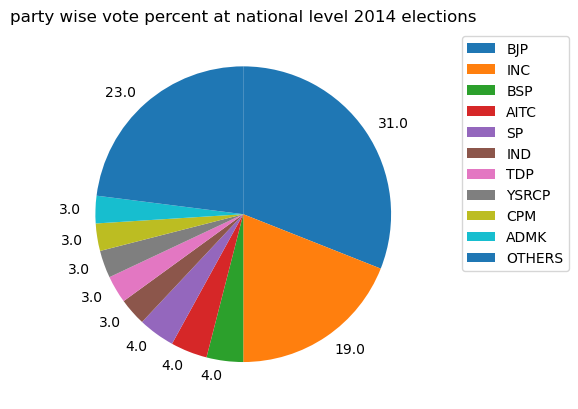

<Figure size 640x480 with 0 Axes>

In [65]:
# keeping pie plot simple
voteshareforplot14 = totalvotes14.head(10).reset_index()
voteshareforplot14.loc[len(voteshareforplot14)]=['OTHERS',119487048,23.0]
voteshareforplot14

plt.pie(voteshareforplot14['vote_percent_by_voted'],labels=voteshareforplot14['vote_percent_by_voted'],startangle=90,counterclock=False)
plt.legend(voteshareforplot14['party'],loc='best',bbox_to_anchor=(1,1,0.4,0))
plt.title('party wise vote percent at national level 2014 elections')
plt.show()
plt.savefig('2014votesplitnationallevel')

In [67]:
# state level vote split 2014

statelevelvotesplit14 = pd.DataFrame(data14.groupby(['state','party'])['total_votes'].sum()).reset_index()
statelevelvotesplit14

,state,party,total_votes
0,Andaman & Nicobar Islands,AAAP,3737
1,Andaman & Nicobar Islands,AIFB,225
2,Andaman & Nicobar Islands,AITC,2283
3,Andaman & Nicobar Islands,BJP,90969
4,Andaman & Nicobar Islands,BSP,1139
...,...,...,...
1058,West Bengal,SUCI,350616
1059,West Bengal,SWJP,5340
1060,West Bengal,TRMRPPI,1071
1061,West Bengal,WPOI,48006


In [71]:
#electors_state = pd.DataFrame(electors_constituency.groupby('state')['total_electors'].sum()).reset_index().sort_values(by='total_electors',ascending=False)
#electors_state

statelevelpartysplit14 = pd.merge(statelevelvotesplit14,electors_state14,on='state')
statelevelpartysplit14['vote_percent'] = np.round(100*statelevelpartysplit14['total_votes']/statelevelpartysplit14['total_electors'],2)

statelevelpartysplit14.sort_values(by='vote_percent',ascending=False,inplace=True)

statelevelpartysplit14 = statelevelpartysplit14.loc[statelevelpartysplit14['vote_percent']>30]

statelevelpartysplit14.to_csv(r"C:\Users\ASUS\datascience\competitions\codebasics-resumechallenge11\RPC11_Input_For_Participants\datasets\statelevelpartysplit14.csv")

In [ ]:
# data 2019 analysis

In [ ]:
constituencywisevoted19 = data19.groupby(['pc_name','state'])['total_votes'].sum()
constituencywisevoters19 = data19.groupby('pc_name')['total_electors'].mean()
constituency_vote_turnout_ratio19 = pd.DataFrame(np.floor(100*constituencywisevoted19/constituencywisevoters19)).reset_index()
constituency_vote_turnout_ratio19.columns = ['pc_name','state','vote_turnout_ratio']
constituency_vote_turnout_ratio19 = constituency_vote_turnout_ratio19.sort_values(by='vote_turnout_ratio',ascending=False)
top5constituencies19 = constituency_vote_turnout_ratio19.head() # something wrong
bottom5constituencies19 = constituency_vote_turnout_ratio19.sort_values(by='vote_turnout_ratio').head()
print(top5constituencies19)
print()
print(bottom5constituencies19)

In [ ]:
subsetdata19 = data19[['state','pc_name','total_electors']].drop_duplicates()
statewiseelectors19 = subsetdata19.groupby('state')['total_electors'].sum()
statewisevoted19 = data19.groupby('state')['total_votes'].sum()
state_vote_turnout_ratio19 = np.floor(100*statewisevoted19/statewiseelectors19)
print(state_vote_turnout_ratio19.sort_values(ascending=False).head())
print()
print(state_vote_turnout_ratio19.sort_values().head())

In [ ]:
# MARGINS 19
top2_19 = data19.groupby(['state','pc_name'])['total_votes'].nlargest(2).reset_index()
top2_19 = pd.merge(top2_19,data19,how='left',left_on='level_2',right_index=True)[['state_x','pc_name_x','candidate','total_votes_y']]
top2_19

In [ ]:
list = []
for i in range(0,len(top2_19)-1,2):
    state_i = top2_19['state_x'][i]
    pc_name_i = top2_19['pc_name_x'][i]
    candidate_i = top2_19['candidate'][i]
    margin_i = top2_19['total_votes_y'][i]-top2_19['total_votes_y'][i+1]
    list.append([state_i,pc_name_i,candidate_i,margin_i])

margin_table19 = pd.DataFrame(list)
margin_table19.columns = ['state/UT','pc_name','candidate','margin']
margins19 = margin_table19.sort_values(by='margin',ascending=False).head()
margins19

In [ ]:
# NOTA 19
nota_votes19 = data19[ data19['party'] == 'NOTA' ][['pc_name','state','total_votes','total_electors']].set_index('pc_name')
nota_votes19['nota_percent'] = np.floor(100*nota_votes19['total_votes']/nota_votes19['total_electors'])
nota_highest_by_number19 = nota_votes19.sort_values(by='total_votes',ascending=False).head(5) # by absolute number
nota_highest_by_percent19 = nota_votes19.sort_values(by='nota_percent',ascending=False).head(5) # by percentage
print(nota_highest_by_number19)
print()
print(nota_highest_by_percent19)

In [ ]:
# PARTY WISE SPLIT
totalvotes19 = pd.DataFrame(data19.groupby('party')['total_votes'].sum().sort_values(ascending=False)) # party-votes_won
#totalvotes = totalvotes.loc[totalvotes['']>1000]

total_voters_in_india19 = np.floor(constituencywisevoters19).sum() # no. of voters overall in india
total_voted_in_india19 = data19['total_votes'].sum()  # number of voted overall in india
overall_voter_turnout19 = np.round(100*total_voted_in_india19/total_voters_in_india19,2)
print(total_voted_in_india19, total_voters_in_india19, overall_voter_turnout19)
print(totalvotes19)

totalvotes19['vote_percent_by_voted'] = 100*np.round(totalvotes19/total_voted_in_india19,2)
#totalvotes14['vote_percent_by_voters'] = totalvotes14/total_voters_in_india14
totalvotes19 = totalvotes19.sort_values(by='vote_percent_by_voted',ascending=False)

In [ ]:
# keeping pie plot simple
voteshareforplot = totalvotes19.head(10).reset_index()
voteshareforplot.loc[len(voteshareforplot)]=['OTHERS',1300166177,21]
voteshareforplot

plt.pie(voteshareforplot['vote_percent_by_voted'],labels=voteshareforplot['vote_percent_by_voted'],startangle=90,counterclock=False)
plt.legend(voteshareforplot['party'],loc='best',bbox_to_anchor=(1,1,0.4,0))
plt.title('party wise vote percent at national level 2019 elections')
plt.show()
plt.savefig('2019votesplitnationallevel')

In [ ]:
# state level vote split 2014

statelevelvotesplit19 = pd.DataFrame(data19.groupby(['state','party'])['total_votes'].sum()).reset_index()
statelevelvotesplit19

In [ ]:
#electors_state = pd.DataFrame(electors_constituency.groupby('state')['total_electors'].sum()).reset_index().sort_values(by='total_electors',ascending=False)
#electors_state

statelevelpartysplit19 = pd.merge(statelevelvotesplit19,electors_state,on='state')
statelevelpartysplit19['vote_percent'] = np.round(100*statelevelpartysplit19['total_votes']/statelevelpartysplit19['total_electors'],2)

statelevelpartysplit19.sort_values(by='vote_percent',ascending=False,inplace=True)

statelevelpartysplit19 = statelevelpartysplit19.loc[statelevelpartysplit19['vote_percent']>30]

statelevelpartysplit19.to_csv(r"C:\Users\ASUS\datascience\competitions\codebasics-resumechallenge11\RPC11_Input_For_Participants\datasets\statelevelpartysplit19.csv")

In [ ]:
# comparison


In [ ]:
notavotes_14 = data14.loc[data14['party']=='NOTA']['total_votes'].sum()
notapercent_14 = notavotes_14/total_voted_in_india14
notapercent_14

In [ ]:
notavotes_19 = data19.loc[data19['party']=='NOTA']['total_votes'].sum()
notapercent_19 = notavotes_19/total_voted_in_india19
notapercent_19

In [ ]:
winners14 = pd.DataFrame(data14.groupby(['state','pc_name'])['total_votes'].nlargest(1)).reset_index()
indexes = winners14['level_2']
list=[]
for index in indexes:
    row = data14.iloc[index,[0,1,6,10,11]]
    list.append(row)
stats14 = pd.DataFrame(list)
stats14['votepercent'] = (100*stats14['total_votes']/stats14['total_electors']).round(2)
stats14 = stats14.drop(['total_votes','total_electors'],axis=1)
stats14

In [ ]:
winners19 = pd.DataFrame(data19.groupby(['state','pc_name'])['total_votes'].nlargest(1)).reset_index()
indexes = winners19['level_2']
list=[]
for index in indexes:
    row = data19.iloc[index,[0,1,6,10,11]]
    list.append(row)
stats19 = pd.DataFrame(list)
stats19['votepercent'] = (100*stats19['total_votes']/stats19['total_electors']).round(2)
stats19 = stats19.drop(['total_votes','total_electors'],axis=1)
stats19

In [ ]:
table = pd.merge(stats14,stats19,on=['state','pc_name'],suffixes=('_14','_19'))
table1 = table.loc[table['party_14']==table['party_19']].sort_values('votepercent_19',ascending=False)
table1

In [ ]:
table2 = table.loc[table['party_14']!=table['party_19']]
table2['diff'] = table['votepercent_19'] - table['votepercent_14']
table2.sort_values(by='diff',ascending=False).head(10)

In [ ]:
# q8, Q9
bjp_gain = table1.loc[table1['party_19']=='BJP'].drop(['party_14','party_19'],axis=1)
bjp_gain['gain'] = bjp_gain['votepercent_19'] - bjp_gain['votepercent_14']
bjp_gain = bjp_gain.sort_values(by='gain',ascending=False)
bjp_gain

In [ ]:
bjp_gain.tail()

In [ ]:
inc_gain = table1.loc[table1['party_19']=='INC'].drop(['party_14','party_19'],axis=1)
inc_gain['gain'] = inc_gain['votepercent_19'] - inc_gain['votepercent_14']
inc_gain = inc_gain.sort_values(by='gain',ascending=False)
inc_gain.head()

In [ ]:
inc_gain.tail()

In [ ]:
winners14 = data14.groupby(['state','pc_name'])['total_votes'].nlargest(1).reset_index()
winners14= pd.merge(winners14,data14,how='left',left_on='level_2',right_index=True)[['state_x','pc_name_x','candidate','party','total_votes_y']]
winners14

seatswon_14 = pd.DataFrame(winners14.groupby('party')['state_x'].count().sort_values(ascending=False).head(10))
seatswon_14['percent'] = np.round(100*seatswon_14/511,2)
seatswon_14.columns=['seats_won','seat_percent']
seatswon_14

In [ ]:
# data14.loc[data14['pc_name']=='Amalapuram'].sort_values('total_votes',ascending=False)

In [ ]:
winners19 = data19.groupby(['state','pc_name'])['total_votes'].nlargest(1).reset_index()
winners19= pd.merge(winners19,data19,how='left',left_on='level_2',right_index=True)[['state_x','pc_name_x','candidate','party','total_votes_y']]
winners19

seatswon_19 = pd.DataFrame(winners19.groupby('party')['state_x'].count().sort_values(ascending=False).head(10))
seatswon_19['percent'] = np.round(100*seatswon_19/511,2)
seatswon_19.columns=['seats_won','seat_percent']
seatswon_19

In [ ]:
seatswon_14